In [2]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
cancer =  load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
df = pd.DataFrame(cancer.data[:,:2],columns=cancer.feature_names[:2])

df['class']= cancer.target
df.sample(5)

,mean radius,mean texture,class
72,17.20,24.52,0
454,12.62,17.15,1
421,14.69,13.98,1
560,14.05,27.15,1
322,12.86,13.32,1


In [14]:
df.describe().round(2)

,mean radius,mean texture,class
count,569.00,569.00,569.00
mean,14.13,19.29,0.63
std,3.52,4.30,0.48
min,6.98,9.71,0.00
25%,11.70,16.17,0.00
50%,13.37,18.84,1.00
75%,15.78,21.80,1.00
max,28.11,39.28,1.00


In [20]:
df.groupby('class').count()

,mean radius,mean texture
class,,
0,212,212
1,357,357


In [22]:
target_map = {0:'malignant', 1:'benign'}  # ได้ผลลัพธ์เหมือนด้านบน
df['class'] = df['class'].map(target_map)

# df.head()
df.sample(5, random_state=1)

,mean radius,mean texture,class
421,14.69,13.98,benign
47,13.17,18.66,malignant
292,12.95,16.02,benign
186,18.31,18.58,malignant
414,15.13,29.81,malignant


In [23]:
df.isnull().sum()


mean radius     0
mean texture    0
class           0
dtype: int64

<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>

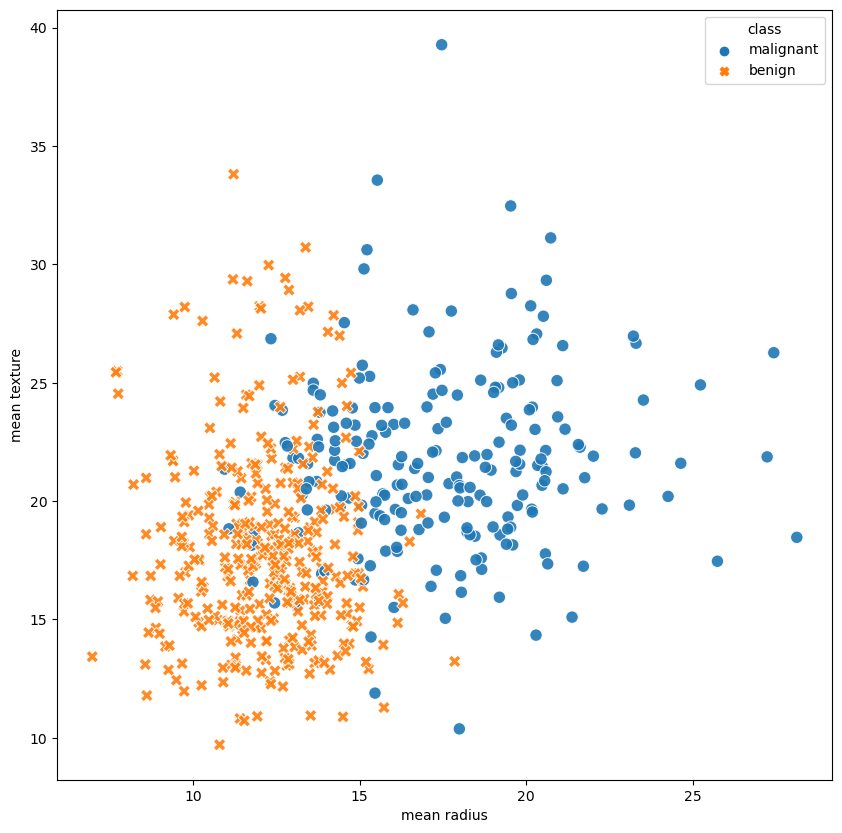

In [25]:
#Data visuazation
plt.figure(figsize=(10,10))
sns.scatterplot(x='mean radius', y='mean texture',data=df,hue='class',style='class'
               ,alpha=0.9,edgecolor='w',s=80)

In [27]:
#label Encoding
y, class_names = pd.factorize(df['class'])

In [28]:
y[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1], dtype=int64)

In [29]:
class_names

Index(['malignant', 'benign'], dtype='object')

In [30]:
pd.unique(y)

array([0, 1], dtype=int64)

In [32]:
#X and Y
X = df.drop('class',axis=1)

np.unique(y)

array([0, 1], dtype=int64)

In [34]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_sc = sc.fit_transform(X)
X_sc

array([[0.52103744, 0.0226581 ],
       [0.64314449, 0.27257355],
       [0.60149557, 0.3902604 ],
       ...,
       [0.45525108, 0.62123774],
       [0.64456434, 0.66351031],
       [0.03686876, 0.50152181]])

In [35]:
cancer.feature_names[:2]

array(['mean radius', 'mean texture'], dtype='<U23')

In [40]:
dfsc = pd.DataFrame(X_sc,columns=['mean radius', 'mean texture'])
dfsc['class'] = y
dfsc.describe().round(10)

,mean radius,mean texture,class
count,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.627417
std,0.166787,0.145453,0.483918
min,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.000000
50%,0.302381,0.308759,1.000000
75%,0.416442,0.408860,1.000000
max,1.000000,1.000000,1.000000


In [39]:
dfsc.sample(10)

,mean radius,mean texture,class
474,0.184533,0.199865,1
108,0.723603,0.336828,0
457,0.294808,0.525533,1
180,0.957878,0.411228,0
13,0.419755,0.481569,0
149,0.319892,0.277308,1
461,0.967343,0.560027,0
389,0.594870,0.456544,0
278,0.312793,0.274941,1
276,0.205831,0.150490,1


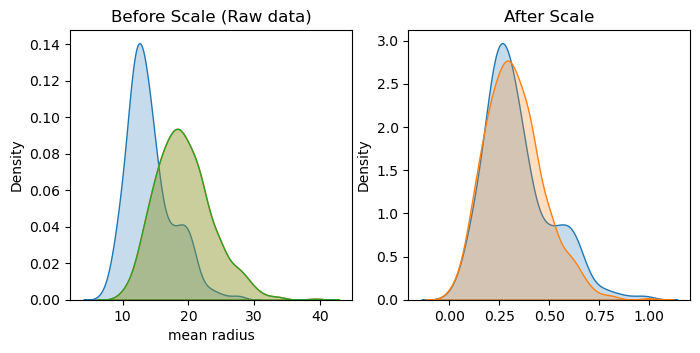

In [41]:
#KDE plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3.5))

ax1.set_title('Before Scale (Raw data)')
sns.kdeplot(df['mean radius'], fill=True, ax=ax1)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

ax2.set_title('After Scale')
sns.kdeplot(X_sc[:,0], fill=True, ax=ax2)
sns.kdeplot(X_sc[:,1], fill=True, ax=ax2)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

plt.show()

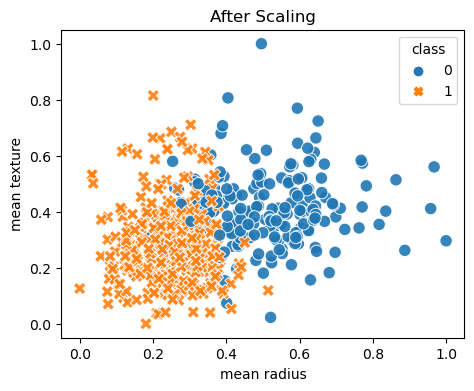

In [42]:
plt.figure(figsize=(5.2, 4))

sns.scatterplot(x='mean radius', y='mean texture', data=dfsc, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)
plt.title('After Scaling')
plt.show()

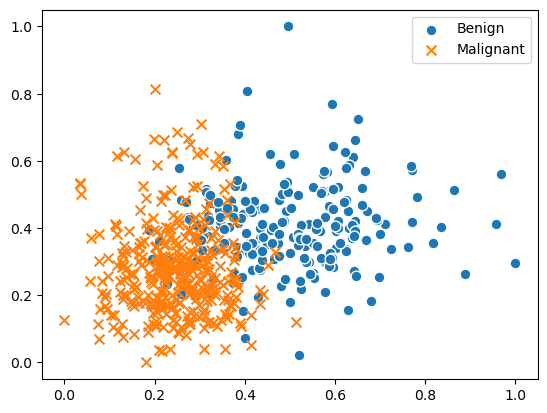

In [43]:
# use  Scatter; Matplotlib
plt.scatter(X_sc[:,0][y==0], X_sc[:,1][y==0], marker='o', edgecolor='w', s=60, label='Benign')
plt.scatter(X_sc[:,0][y==1], X_sc[:,1][y==1], marker='x', s=50, label='Malignant')
plt.legend()
plt.show()

In [47]:
from sklearn.model_selection import train_test_split

X_train , X_test,y_train , y_test =train_test_split(X_sc,y,test_size=0.25,random_state=2)
X_train.shape ,X_test.shape

((426, 2), (143, 2))

In [48]:
y_train.shape ,y_test.shape

((426,), (143,))

In [49]:
## Training set (class 0 & 1)
print('Train; Class 0:', len(y_train[y_train==0]))
print('Train; Class 1:', len(y_train[y_train==1]))
print('Total:',len(y_train))

Train; Class 0: 156
Train; Class 1: 270
Total: 426


In [50]:
#Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input

In [51]:
X_train.shape

(426, 2)

In [68]:
# Sequential Model using Input
model = Sequential()

# model.add(Input(shape=(2,)))
model.add(Input(shape=(2,)))

model.add(Dense(32, activation='relu'))  
model.add(Dense(128, activation='relu'))  
model.add(Dense(128, activation='relu')) 
model.add(Dense(32, activation='relu'))  
model.add(Dense(128, activation='relu'))  
model.add(Dense(128, activation='relu'))  
model.add(Dense(32, activation='relu')) 
model.add(Dense(32, activation='relu'))  
model.add(Dense(32, activation='relu'))  

model.add(Dense(1, activation='sigmoid'))   # 2 class (Binary classification)

In [69]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 32)                96        
                                                                 
 dense_49 (Dense)            (None, 128)               4224      
                                                                 
 dense_50 (Dense)            (None, 128)               16512     
                                                                 
 dense_51 (Dense)            (None, 32)                4128      
                                                                 
 dense_52 (Dense)            (None, 128)               4224      
                                                                 
 dense_53 (Dense)            (None, 128)               16512     
                                                                 
 dense_54 (Dense)            (None, 32)               

In [70]:
model.output_shape

(None, 1)

In [71]:
model.get_config()

{'name': 'sequential_7',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_4'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_48',
    'trainable': True,
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_49',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'co

In [72]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [75]:
import time

start = time.time()
history = model.fit(X_train, y_train, epochs=100, verbose=1, batch_size=32, validation_split=0.25) # 10 +10 40 100
end = time.time()

print(f"Time Taken {end - start:.3f} secs")
print("Time Taken: {:.3f} secs".format(end - start))

Epoch 1/100
10/10 [==============================] - 5s 87ms/step - loss: 0.6902 - accuracy: 0.7429 - val_loss: 0.6845 - val_accuracy: 0.7383
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6737 - accuracy: 0.8182 - val_loss: 0.6559 - val_accuracy: 0.8972
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6245 - accuracy: 0.8871 - val_loss: 0.5864 - val_accuracy: 0.7850
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5323 - accuracy: 0.8589 - val_loss: 0.4569 - val_accuracy: 0.8224
Epoch 5/100
10/10 [==============================] - 0s 13ms/step - loss: 0.4065 - accuracy: 0.8683 - val_loss: 0.3510 - val_accuracy: 0.8318
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 0.3621 - accuracy: 0.8527 - val_loss: 0.2514 - val_accuracy: 0.9346
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.2726 - accuracy: 0.8809 - val_loss: 0.2452 - val_accuracy: 0.9065
Epoch 

In [76]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 10}

In [77]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

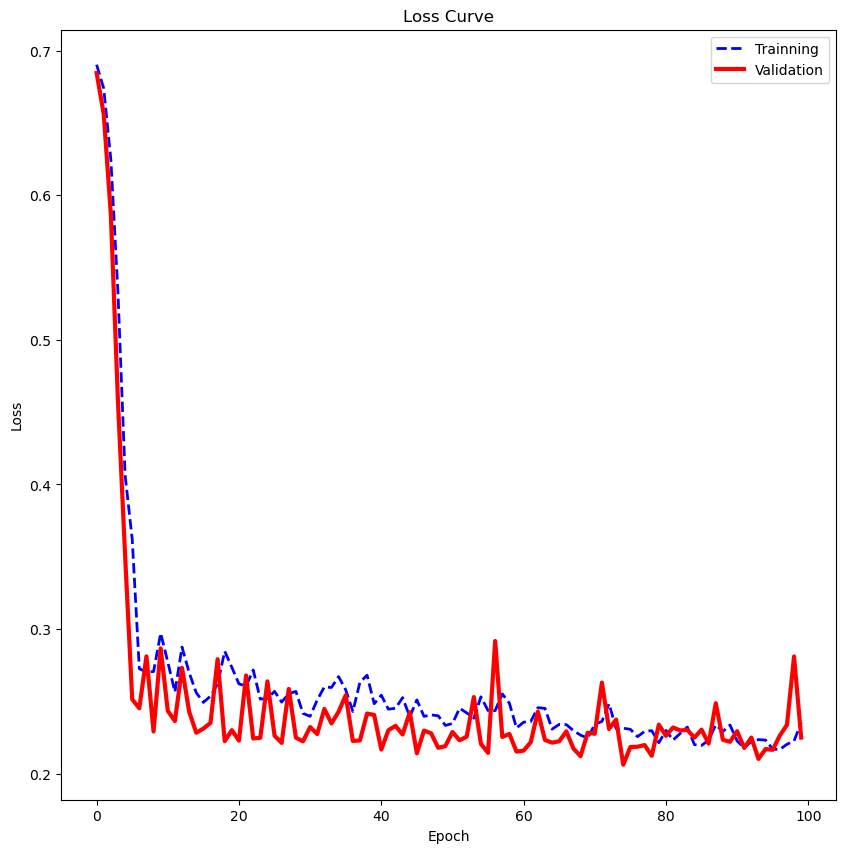

In [79]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss Curve')
plt.show()